In [554]:
import tensorflow as tf
import pandas as pd
import numpy as np

print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Lets try to predict if a student might have a learning disability.

In [555]:
df = pd.read_csv("StudentPerformanceFactors.csv")

In [556]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [557]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [558]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [559]:
df.dropna(subset=["Parental_Education_Level"], inplace=True)
df.dropna(subset=["Distance_from_Home"], inplace=True)
df.dropna(subset=["Teacher_Quality"], inplace=True)


In [560]:
df.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [561]:
df['Learning_Disabilities'].value_counts()

Learning_Disabilities
No     5710
Yes     668
Name: count, dtype: int64

## Correlation Matrix of numerical features

In [562]:
import matplotlib.pyplot as plt
import seaborn as sns

## Data visualized per count

In [563]:
#for col in df:
#    if df[col].dtype != '0':
#        sns.histplot(df[col], kde=True, stat='count')
#        plt.show()

## Before cleaning data

In [564]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


## Clean Data

In [565]:
from sklearn.preprocessing import LabelEncoder


In [566]:
ordinal_columns = [
    'Parental_Involvement',      # Low < Medium < High
    'Access_to_Resources',       # Low < Medium < High
    'Motivation_Level',          # Low < Medium < High
    'Family_Income',             # Low < Medium < High
    'Teacher_Quality',           # Low < Medium < High
    'Parental_Education_Level',  # High School < College < Postgraduate
]

nominal_columns = [
    'Extracurricular_Activities',  # Yes, No
    'Internet_Access',             # Yes, No
    'School_Type',                 # Public, Private
    'Peer_Influence',              # Positive, Neutral, Negative
    'Gender'                       # Male, Female
]
# Removing outliers from dataset based on the Z-score method
df = df.drop(['Distance_from_Home'], axis=1)

df = pd.get_dummies(df, columns=nominal_columns, drop_first=True)
df['Learning_Disabilities'] = df['Learning_Disabilities'].replace({'Yes': 1, 'No': 0})

label_encoder = LabelEncoder()
for col in ordinal_columns:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

/var/folders/ln/pbd4th9d3418040jtsw9xsmm0000gn/T/ipykernel_89113/3994578413.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Learning_Disabilities'] = df['Learning_Disabilities'].replace({'Yes': 1, 'No': 0})


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Exam_Score,Extracurricular_Activities_Yes,Internet_Access_Yes,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Gender_Male
0,23,84,1,0,7,73,1,0,1,2,3,0,1,67,False,True,True,False,True,True
1,19,64,1,2,8,59,1,2,2,2,4,0,0,61,False,True,True,False,False,False
2,24,98,2,2,7,91,2,2,2,2,4,0,2,74,True,True,True,True,False,True
3,29,89,1,2,8,98,2,1,2,2,4,0,1,71,True,True,True,False,False,True
4,19,92,2,2,6,65,2,3,2,0,4,0,0,70,True,True,True,True,False,False


In [567]:
df.shape

(6378, 20)

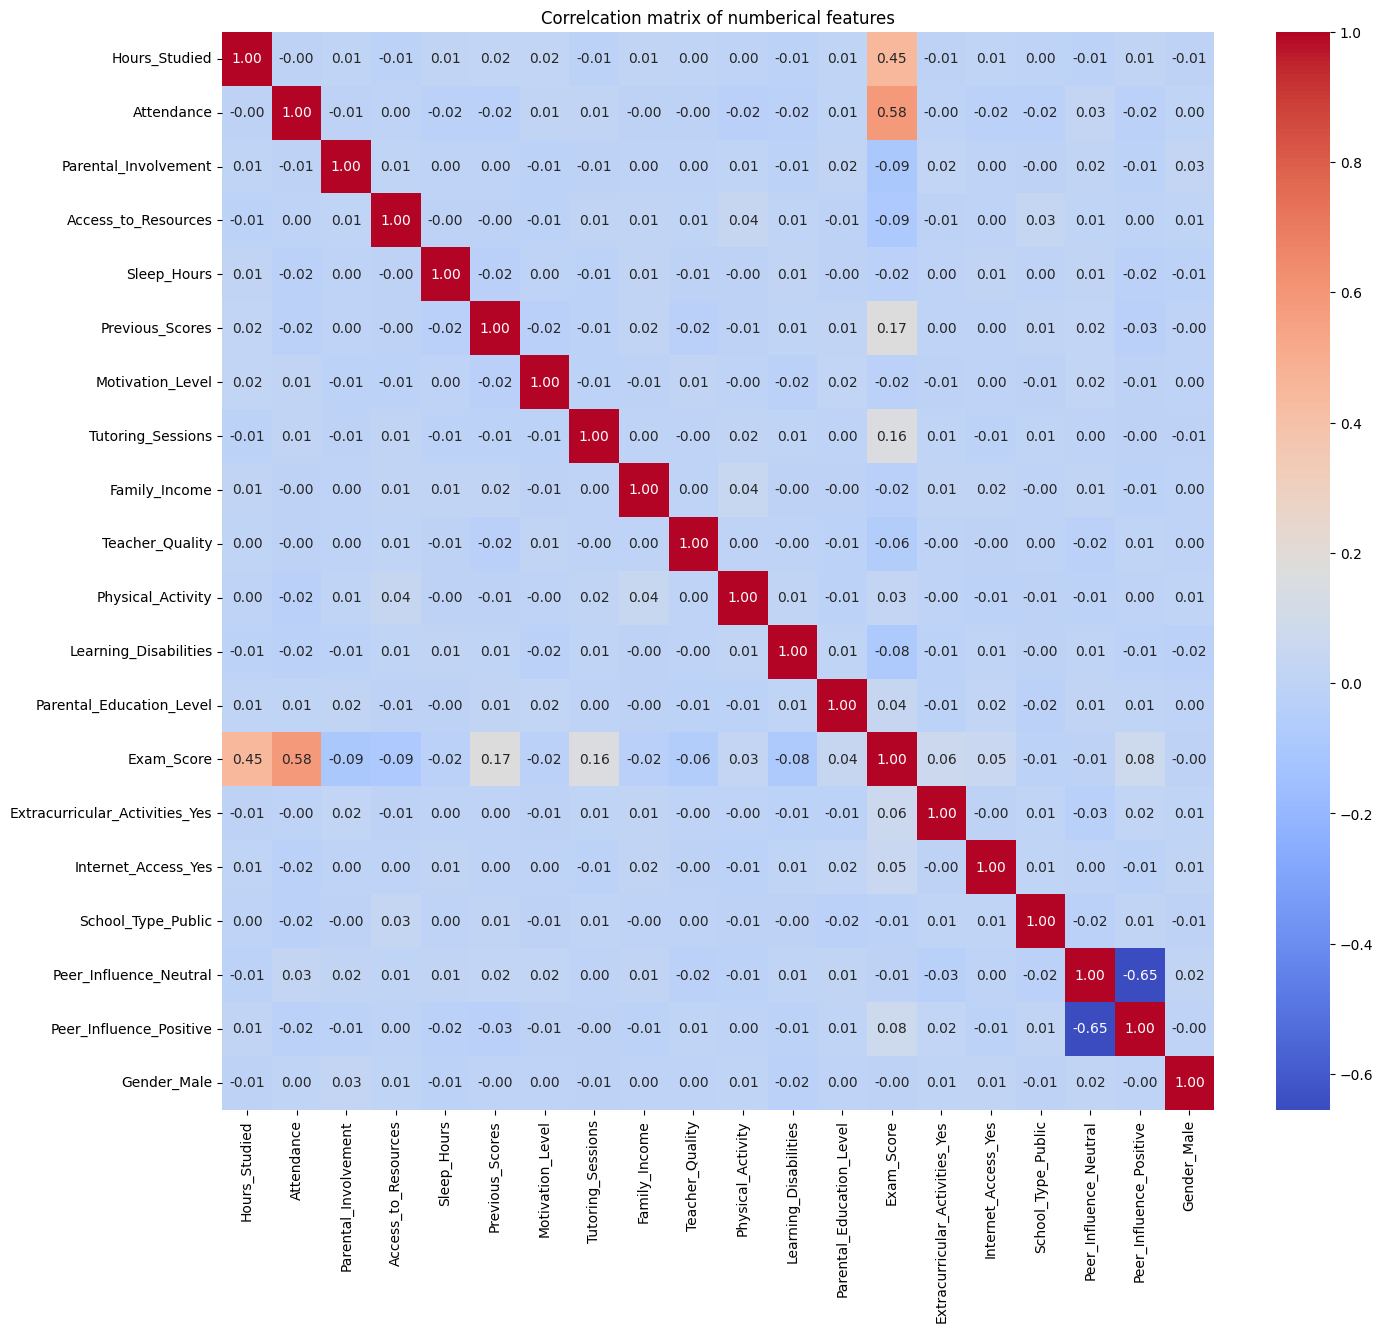

In [568]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(16,14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlcation matrix of numberical features")
plt.show()

In [569]:
z = np.abs((df - df.mean()) / df.std())
threshold = 3
df= df[(z < threshold).all(axis=1)]

In [570]:
df_pos = df[df['Learning_Disabilities'] == 1]
df_neg = df[df['Learning_Disabilities'] == 0]

df_neg_sampled = df_neg.sample(n=2 * len(df_pos), random_state=42)


df_balanced = pd.concat([df_pos, df_neg_sampled], axis=0)

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

df = df_balanced

df.shape

(1824, 20)

## Remove outliers in Exam_score
#### Z-Score measures how many standard deviations a data point is from the mean

In [571]:
## df.drop(columns=['Gender_Male','Teacher_Quality','Family_Income','Physical_Activity','Extracurricular_Activities_Yes','Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Sleep_Hours', 'Peer_Influence_Neutral', 'School_Type_Public', 'Internet_Access_Yes'])
## df = df.drop("Learning_Disabilities", axis=1)
X = df[['Hours_Studied', 'Attendance', 'Previous_Scores', 'Exam_Score']]
y = df["Learning_Disabilities"]

## Brouta Algorithm For feature selection

In [572]:

from sklearn.ensemble import RandomForestClassifier
from tqdm.notebook import tqdm


""""
for col in X.columns:
    X[f"shadow_{col}"] = X[col].sample(frac=1).reset_index(drop=True)

"""


def get_important_features(X, y):
    rf = RandomForestClassifier(max_depth=20)
    rf.fit(X, y)

    #create dic of feature improtances
    # {feature_name : importance} created from zip (two identical columns)
    importances = {feature_name: f_importance for feature_name, f_importance in zip(X.columns, rf.feature_importances_)}
    # isolate importance of shadow feautres
    only_shadow_feat_importance = { key: value for key, value in importances.items() if "shadow" in key}
    # get importance level of most important shadow feature
    highest_shadow_feature = list(dict(sorted(only_shadow_feat_importance.items(), key=lambda item: item[1], reverse=True)).values())[0]
    # get original feature which fulfill boruta selection criteria
    selected_features = [key for key, value in importances.items() if value > highest_shadow_feature]
    
    return selected_features



""" 
runs = 100

feature_hits = {i: 0 for i in df.columns}
for _ in range(runs):
    imp_features = get_important_features(X, y)
    for key, _ in feature_hits.items():
        if key in imp_features: feature_hits[key] += 1


print(feature_hits)

"""



' \nruns = 100\n\nfeature_hits = {i: 0 for i in df.columns}\nfor _ in range(runs):\n    imp_features = get_important_features(X, y)\n    for key, _ in feature_hits.items():\n        if key in imp_features: feature_hits[key] += 1\n\n\nprint(feature_hits)\n\n'

# For Exam_score important features on a FULL data set 100 runs
{'Hours_Studied': 100, 'Attendance': 100, 'Parental_Involvement': 0, 'Access_to_Resources': 0, 'Sleep_Hours': 0, 'Previous_Scores': 100, 'Motivation_Level': 0, 'Tutoring_Sessions': 0, 'Family_Income': 0, 'Teacher_Quality': 0, 'Physical_Activity': 0, 'Learning_Disabilities': 0, 'Parental_Education_Level': 0, 'Exam_Score': 0, 'Extracurricular_Activities_Yes': 0, 'Internet_Access_Yes': 0, 'School_Type_Public': 0, 'Peer_Influence_Neutral': 0, 'Peer_Influence_Positive': 0, 'Gender_Male': 0}

# For Learning_Disabilities on a partial balanced dataset (2x positive cases)
{'Hours_Studied': 4, 'Attendance': 73, 'Parental_Involvement': 0, 'Access_to_Resources': 0, 'Sleep_Hours': 0, 'Previous_Scores': 46, 'Motivation_Level': 0, 'Tutoring_Sessions': 0, 'Family_Income': 0, 'Teacher_Quality': 0, 'Physical_Activity': 0, 'Learning_Disabilities': 0, 'Parental_Education_Level': 0, 'Exam_Score': 95, 'Extracurricular_Activities_Yes': 0, 'Internet_Access_Yes': 0, 'School_Type_Public': 0, 'Peer_Influence_Neutral': 0, 'Peer_Influence_Positive': 0, 'Gender_Male': 0}


In [573]:
feature_names = X.columns.to_list()


In [574]:
X.shape

(1824, 4)

In [575]:
X.columns

Index(['Hours_Studied', 'Attendance', 'Previous_Scores', 'Exam_Score'], dtype='object')

In [576]:
y.shape

(1824,)

## Logistic Regression

In [577]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, confusion_matrix
)


# 2) Time-aware split recommended in production; for now, random split:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# 3) Pipeline with scaling + logistic regression
clf = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("smote", SMOTE(sampling_strategy='auto', k_neighbors=4, random_state=42)),
    ("lr", LogisticRegression(
        solver="liblinear",
        random_state=42,
        max_iter=2000,
    ))
])

# Train
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("PR AUC:", average_precision_score(y_test, y_proba))

# Predict a new student (order matches feature_names)
"""
new_student = pd.DataFrame([{
    "Hours_Studied": 10,
    "Attendance": 33,
    "Previous_Scores": 20,
    "Tutoring_Sessions": 10,
    "Exam_Score": 22,
    "Peer_Influence_Positive": 0,
    "Gender_Male": 1,
}])[feature_names]

pred_class = clf.predict(new_student)[0]
pred_prob  = clf.predict_proba(new_student)[0, 1]

print("Predicted class:", pred_class)
print("Predicted probability:", round(pred_prob, 4))

"""



Accuracy: 0.6328767123287671
Precision: 0.4659090909090909
Recall: 0.6721311475409836
F1: 0.5503355704697986
ROC AUC: 0.7165890845307966
PR AUC: 0.5502715777577748


'\nnew_student = pd.DataFrame([{\n    "Hours_Studied": 10,\n    "Attendance": 33,\n    "Previous_Scores": 20,\n    "Tutoring_Sessions": 10,\n    "Exam_Score": 22,\n    "Peer_Influence_Positive": 0,\n    "Gender_Male": 1,\n}])[feature_names]\n\npred_class = clf.predict(new_student)[0]\npred_prob  = clf.predict_proba(new_student)[0, 1]\n\nprint("Predicted class:", pred_class)\nprint("Predicted probability:", round(pred_prob, 4))\n\n'

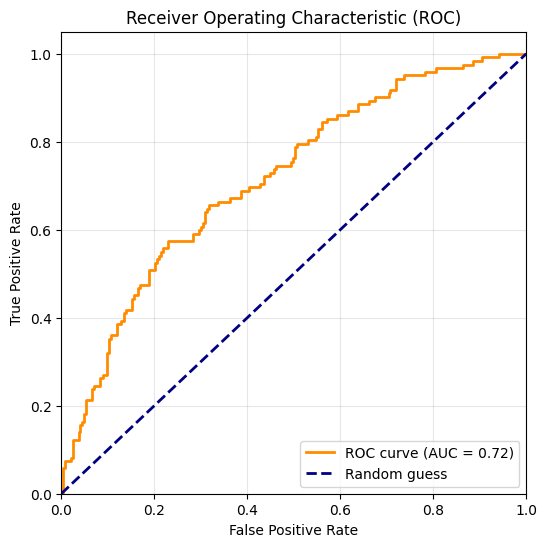

In [578]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute false positive rate, true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plot
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--", label="Random guess")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

## Decision Tree Classifier With Bagging Classifier

In [579]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, confusion_matrix
)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 3) Pipeline with scaling + logistic regression
clf = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("smote", SMOTE(sampling_strategy='auto',random_state=42, k_neighbors=2)),
    ("rf", RandomForestClassifier(n_estimators=300,
    max_depth=None,
    random_state=42,
    class_weight="balanced_subsample"))
])

# Train
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("PR AUC:", average_precision_score(y_test, y_proba))

# Predict a new student (order matches feature_names)
""" 
new_student = pd.DataFrame([{
    "Hours_Studied": 10,
    "Attendance": 33,
    "Previous_Scores": 20,
    "Tutoring_Sessions": 10,
    "Exam_Score": 22,
    "Peer_Influence_Positive": 0,
    "Gender_Male": 1
}])[feature_names]

pred_class = clf.predict(new_student)[0]
pred_prob  = clf.predict_proba(new_student)[0, 1]

print("Predicted class:", pred_class)
print("Predicted probability:", round(pred_prob, 4))
"""


Accuracy: 0.6410958904109589
Precision: 0.5
Recall: 0.3893129770992366
F1: 0.43776824034334766
ROC AUC: 0.6276342402296601
PR AUC: 0.5183977032015277


' \nnew_student = pd.DataFrame([{\n    "Hours_Studied": 10,\n    "Attendance": 33,\n    "Previous_Scores": 20,\n    "Tutoring_Sessions": 10,\n    "Exam_Score": 22,\n    "Peer_Influence_Positive": 0,\n    "Gender_Male": 1\n}])[feature_names]\n\npred_class = clf.predict(new_student)[0]\npred_prob  = clf.predict_proba(new_student)[0, 1]\n\nprint("Predicted class:", pred_class)\nprint("Predicted probability:", round(pred_prob, 4))\n'

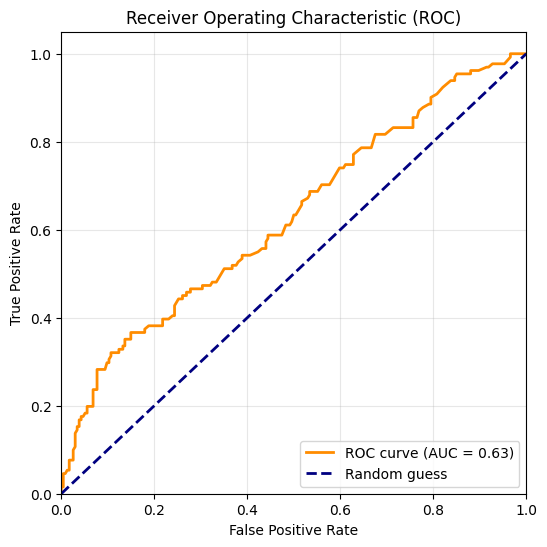

In [580]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute false positive rate, true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plot
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--", label="Random guess")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

## XGBoost

In [581]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBClassifier(
    n_estimators=4000,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="aucpr",      
    scale_pos_weight=8.3,       
    random_state=42
)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
# Evaluate

y_proba = xgb_model.predict_proba(X_test)[:, 1]
mse=mean_squared_error(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("PR AUC:", average_precision_score(y_test, y_proba))

Accuracy: 0.5753424657534246
Precision: 0.42
Recall: 0.48091603053435117
F1: 0.4483985765124555
ROC AUC: 0.6081098714686501
PR AUC: 0.49883834704992636


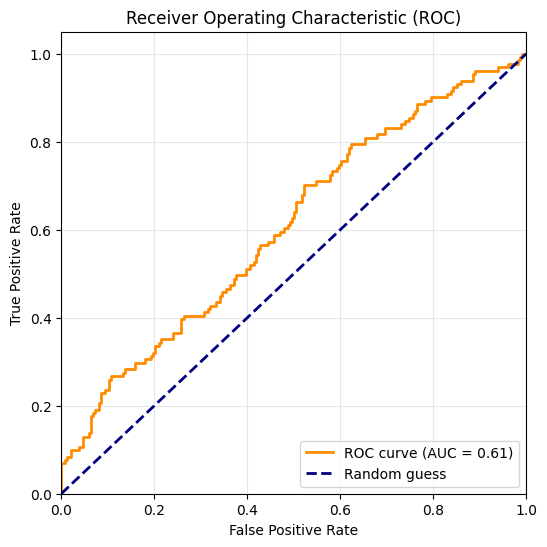

In [582]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute false positive rate, true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plot
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--", label="Random guess")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()